### Constructing a DataFrame for a Weighted Die

In [1]:
import pandas as pd

# Define weighted die PMF
faces = list(range(1, 7))
odds = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]

df = pd.DataFrame({'face': faces, 'odds': odds})

# Compute mean (expected value)
df['x*P(x)'] = df['face'] * df['odds']
mean = df['x*P(x)'].sum()

# Compute variance
df['(x-mean)^2*P(x)'] = ((df['face'] - mean) ** 2) * df['odds']
variance = df['(x-mean)^2*P(x)'].sum()
sd = variance ** 0.5

# Display results
print(df)
print(f"Mean = {mean}, Variance = {variance}, SD = {sd}")

   face  odds  x*P(x)  (x-mean)^2*P(x)
0     1   0.1     0.1            0.576
1     2   0.2     0.4            0.392
2     3   0.3     0.9            0.048
3     4   0.1     0.4            0.036
4     5   0.2     1.0            0.512
5     6   0.1     0.6            0.676
Mean = 3.4, Variance = 2.24, SD = 1.4966629547095767


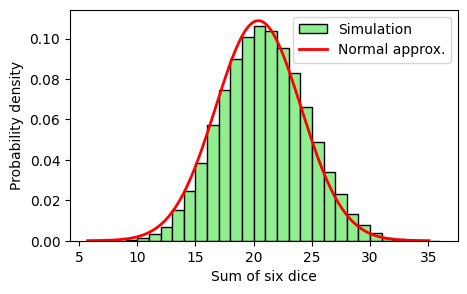

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Weighted die faces and probabilities
faces = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]

# Theoretical mean and variance of one die
mu_single = 3.4
var_single = 2.24

# Six dice
mu_sum = 6 * mu_single
var_sum = 6 * var_single
sd_sum = var_sum**0.5

# Simulation: 100,000 trials of six-die sum
n_trials = 100000
samples = np.random.choice(faces, size=(n_trials, 6), p=probs).sum(axis=1)

# Histogram
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(samples, bins=range(6, 37), density=True,
        histtype='bar', ec='black', color='lightgreen', label='Simulation')

# Superimposed normal approximation
x = np.linspace(mu_sum - 4*sd_sum, mu_sum + 4*sd_sum, 200)
ax.plot(x, norm.pdf(x, mu_sum, sd_sum), 'r-', lw=2, label='Normal approx.')

ax.set_xlabel('Sum of six dice')
ax.set_ylabel('Probability density')
ax.legend()
plt.show()

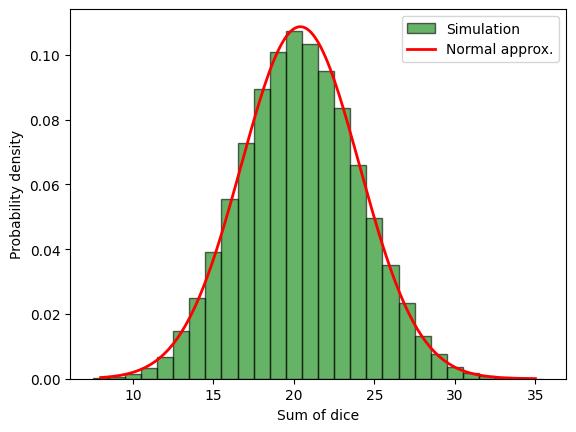

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

odds = [1,2,2,3,3,3,4,5,5,6]  # weighted die

n_rolls = 100000
n_dice = 6  # try 9 for better CLT effect

# Simulate sums
sums = [np.sum(np.random.choice(odds, n_dice)) for _ in range(n_rolls)]

# Theoretical mean and std from simulation
mu = np.mean(sums)
sigma = np.std(sums, ddof=0)

# Histogram with integer-aligned bins
bins = np.arange(min(sums) - 0.5, max(sums) + 1.5, 1)
plt.hist(sums, bins=bins, density=True, color='green', alpha=0.6, edgecolor='black', label='Simulation')

# Normal overlay
xs = np.linspace(min(sums), max(sums), 200)
plt.plot(xs, norm.pdf(xs, mu, sigma), 'r-', lw=2, label='Normal approx.')

plt.xlabel("Sum of dice")
plt.ylabel("Probability density")
plt.legend()
plt.show()
